### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [5]:
# Agregamos una columna para identificar la tienda en cada DataFrame
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

# Unificamos los tres DataFrames en uno solo
tiendas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Limpiamos nombres de columnas para facilitar su uso
tiendas.columns = tiendas.columns.str.strip().str.lower().str.replace(" ", "_")

# Mostramos las columnas para verificar limpieza
tiendas.columns

Index(['producto', 'categoría_del_producto', 'precio', 'costo_de_envío',
       'fecha_de_compra', 'vendedor', 'lugar_de_compra', 'calificación',
       'método_de_pago', 'cantidad_de_cuotas', 'lat', 'lon', 'tienda',
       'tienda'],
      dtype='object')

In [13]:
# Limpiar nombres de columnas
tiendas.columns = tiendas.columns.str.strip().str.lower().str.replace(" ", "_")

# Eliminar columnas duplicadas si existieran
tiendas = tiendas.loc[:, ~tiendas.columns.duplicated()]

# Asegurar que la columna 'tienda' sea tipo texto y unidimensional
tiendas['tienda'] = tiendas['tienda'].astype(str)

# Verificar tipos de datos (opcional)
# print(tiendas.dtypes)


<ipython-input-13-c2d0505e2be6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tiendas['tienda'] = tiendas['tienda'].astype(str)


#1. Análisis de facturación



In [14]:
facturacion = tiendas.groupby('tienda')['precio'].sum().reset_index().rename(columns={'precio': 'facturación_total'})

# 2. Ventas por categoría

In [15]:
ventas_categoria = tiendas.groupby(['tienda', 'categoría_del_producto'])['producto'].count().reset_index().rename(columns={'producto': 'cantidad_vendida'})

# 3. Calificación promedio de la tienda


In [17]:
calificacion_prom = tiendas.groupby('tienda')['calificación'].mean().reset_index().rename(columns={'calificación': 'calificación_promedio'})


# 4. Productos más y menos vendidos

In [18]:
productos_vendidos = tiendas.groupby(['tienda', 'producto']).size().reset_index(name='ventas')
productos_max = productos_vendidos.loc[productos_vendidos.groupby('tienda')['ventas'].idxmax()].reset_index(drop=True)
productos_min = productos_vendidos.loc[productos_vendidos.groupby('tienda')['ventas'].idxmin()].reset_index(drop=True)

# 5. Envío promedio por tienda

In [19]:
envio_promedio = tiendas.groupby('tienda')['costo_de_envío'].mean().reset_index().rename(columns={'costo_de_envío': 'envío_promedio'})

<ipython-input-20-7cf219725565>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=facturacion, x='tienda', y='facturación_total', palette='Blues_d')


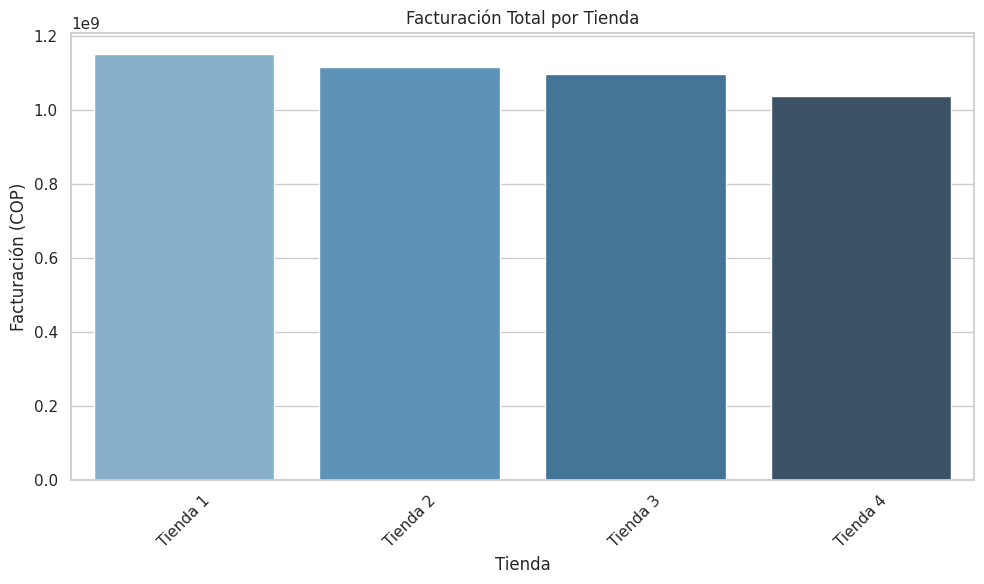

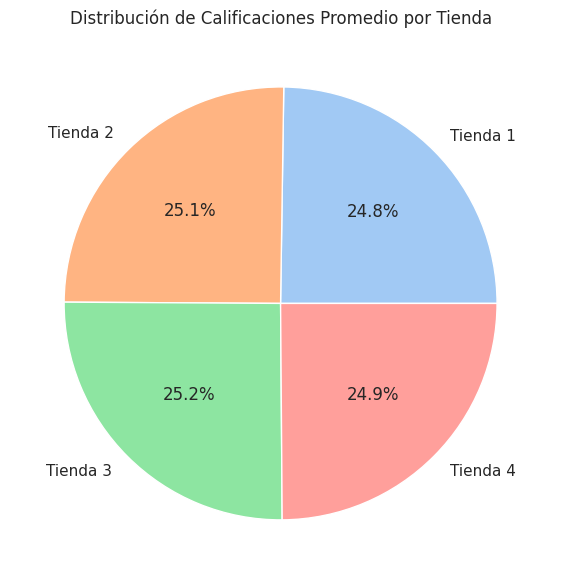

<ipython-input-20-7cf219725565>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=envio_promedio, x='tienda', y='envío_promedio', palette='Greens')


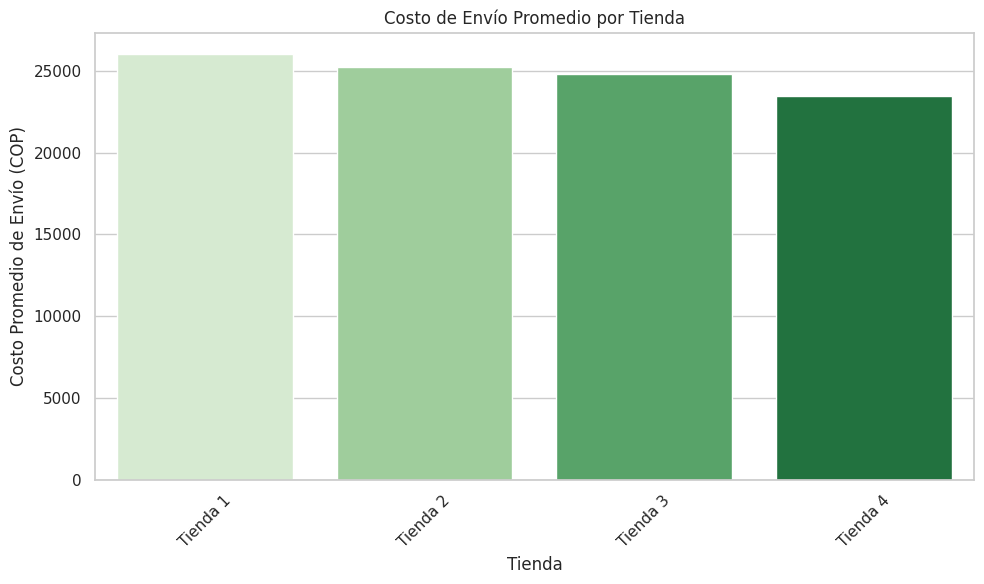

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustes generales para los gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# 1. Gráfico de barras - Facturación total por tienda
plt.figure()
sns.barplot(data=facturacion, x='tienda', y='facturación_total', palette='Blues_d')
plt.title('Facturación Total por Tienda')
plt.ylabel('Facturación (COP)')
plt.xlabel('Tienda')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Gráfico circular - Promedio de calificación por tienda
plt.figure()
plt.pie(calificacion_prom['calificación_promedio'], labels=calificacion_prom['tienda'], autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribución de Calificaciones Promedio por Tienda')
plt.tight_layout()
plt.show()

# 3. Gráfico de barras - Costo de envío promedio por tienda
plt.figure()
sns.barplot(data=envio_promedio, x='tienda', y='envío_promedio', palette='Greens')
plt.title('Costo de Envío Promedio por Tienda')
plt.ylabel('Costo Promedio de Envío (COP)')
plt.xlabel('Tienda')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
